## Importing Libraries 

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Loading the Dataset

In [17]:
# importing the datset from my library and showing the first 10 entries 
df = pd.read_csv(r'C:\Users\HP\Downloads\solarpowerooutput.csv')
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [5]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [7]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


## EDA

### Correlation matrix of the columns 

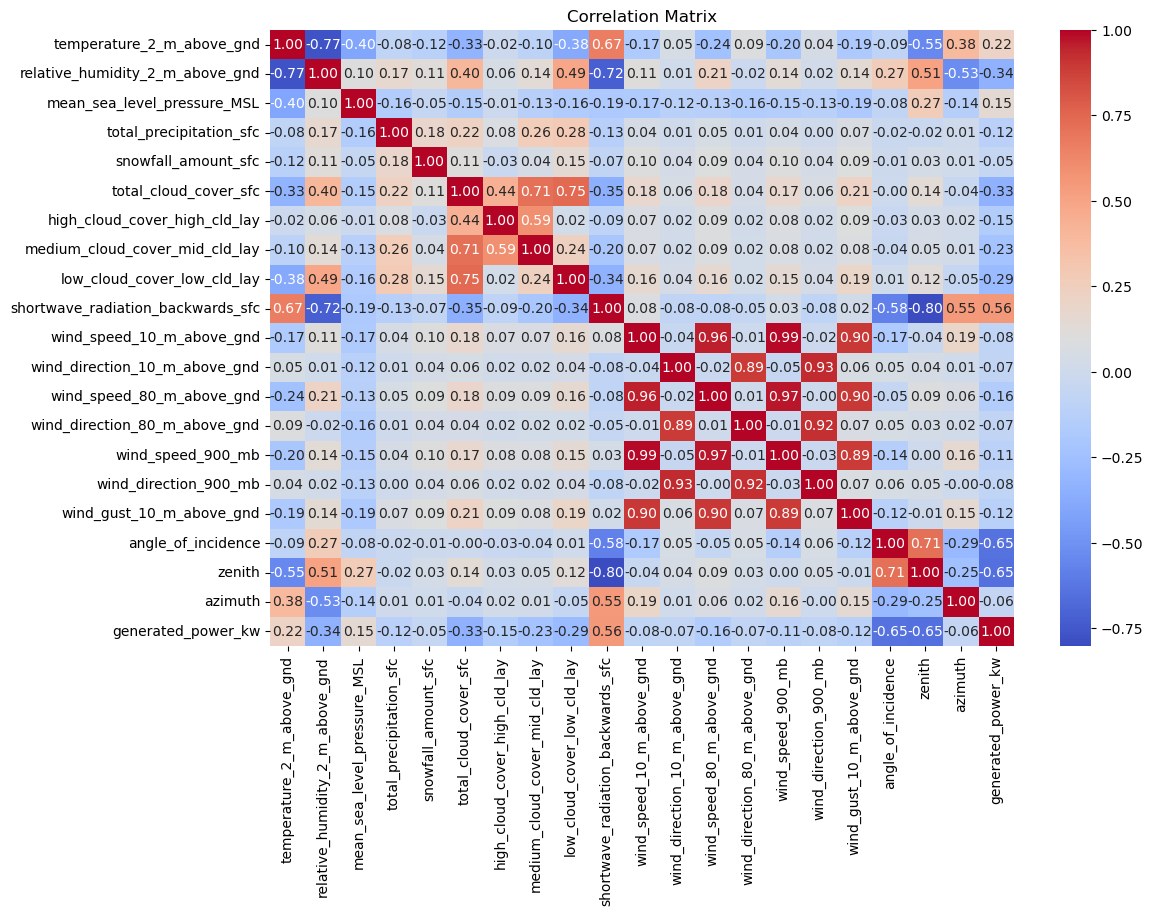

In [8]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Show correlation of all features with 'popularity'

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### How does the Generated Power vs Angle of Incidence

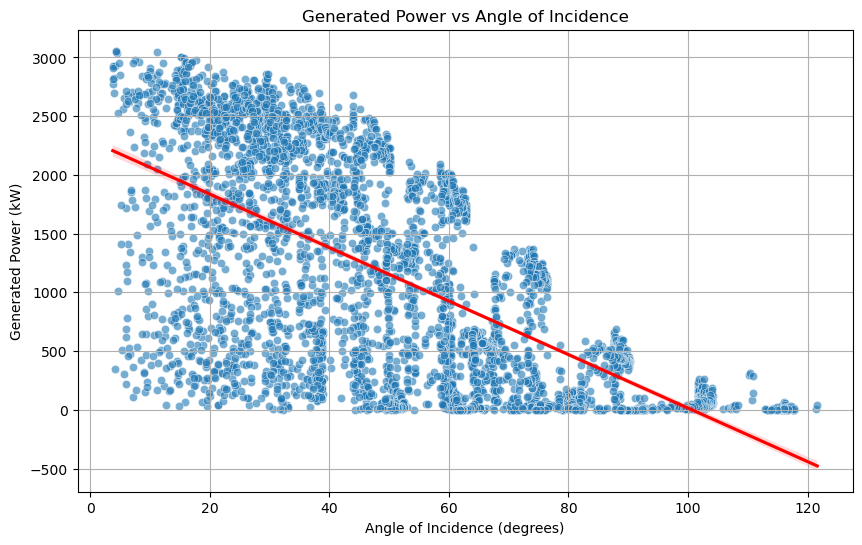

In [9]:
# Scatter plot with a regression line to see trend
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='angle_of_incidence', y='generated_power_kw', alpha=0.6)
sns.regplot(data=df, x='angle_of_incidence', y='generated_power_kw', scatter=False, color='red')

plt.title('Generated Power vs Angle of Incidence')
plt.xlabel('Angle of Incidence (degrees)')
plt.ylabel('Generated Power (kW)')
plt.grid(True)
plt.show()

### Average Generated Power by Cloud Cover Category

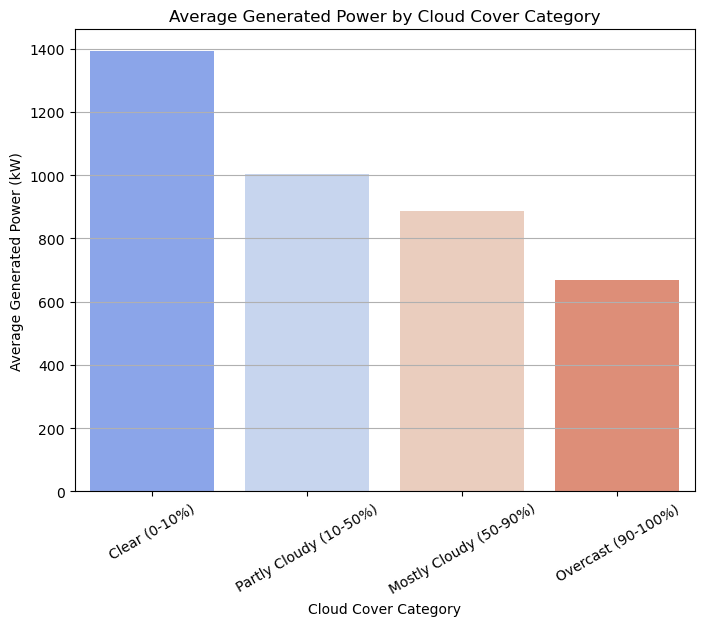

In [10]:

# Step 1: Define cloud cover categories
def cloud_cover_category(cloud_cover):
    if cloud_cover <= 10:
        return 'Clear (0-10%)'
    elif cloud_cover <= 50:
        return 'Partly Cloudy (10-50%)'
    elif cloud_cover <= 90:
        return 'Mostly Cloudy (50-90%)'
    else:
        return 'Overcast (90-100%)'

df['cloud_cover_cat'] = df['total_cloud_cover_sfc'].apply(cloud_cover_category)

# Step 2: Calculate average generated power by cloud cover category
avg_power_by_cloud = df.groupby('cloud_cover_cat')['generated_power_kw'].mean().reset_index()

# Optional: Sort categories logically
category_order = ['Clear (0-10%)', 'Partly Cloudy (10-50%)', 'Mostly Cloudy (50-90%)', 'Overcast (90-100%)']
avg_power_by_cloud['cloud_cover_cat'] = pd.Categorical(avg_power_by_cloud['cloud_cover_cat'], categories=category_order, ordered=True)
avg_power_by_cloud = avg_power_by_cloud.sort_values('cloud_cover_cat')

# Step 3: Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=avg_power_by_cloud, x='cloud_cover_cat', y='generated_power_kw', palette='coolwarm')

plt.title('Average Generated Power by Cloud Cover Category')
plt.xlabel('Cloud Cover Category')
plt.ylabel('Average Generated Power (kW)')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


The Bar chart shows that average Generated power output is high when the cloud is clear or almost clear and has the least average power output when there's an Overcast 

### Solar Shortwave Radiation vs Generated Power

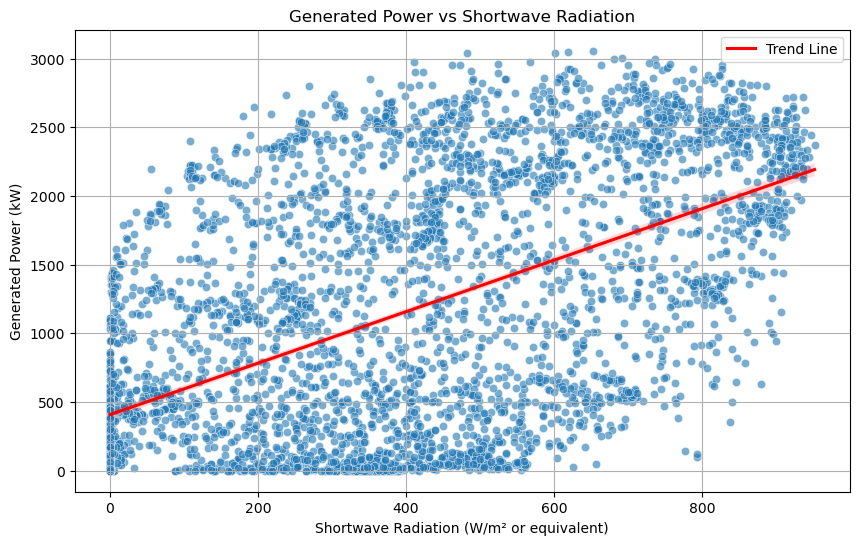

In [11]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='shortwave_radiation_backwards_sfc',
    y='generated_power_kw',
    alpha=0.6
)

sns.regplot(
    data=df,
    x='shortwave_radiation_backwards_sfc',
    y='generated_power_kw',
    scatter=False,
    color='red',
    label='Trend Line'
)

plt.title('Generated Power vs Shortwave Radiation')
plt.xlabel('Shortwave Radiation (W/m² or equivalent)')
plt.ylabel('Generated Power (kW)')
plt.grid(True)
plt.legend()
plt.show()



## Modelling 

In the project, I'll be using multiple regression models.

#### XGBOOST

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Step 1: Define features and target while scaling it 
X = scaler.fit_transform(df.drop('generated_power_kw', axis=1))
y = df['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

XGBoost RMSE: 397.473
XGBoost R² Score: 0.827


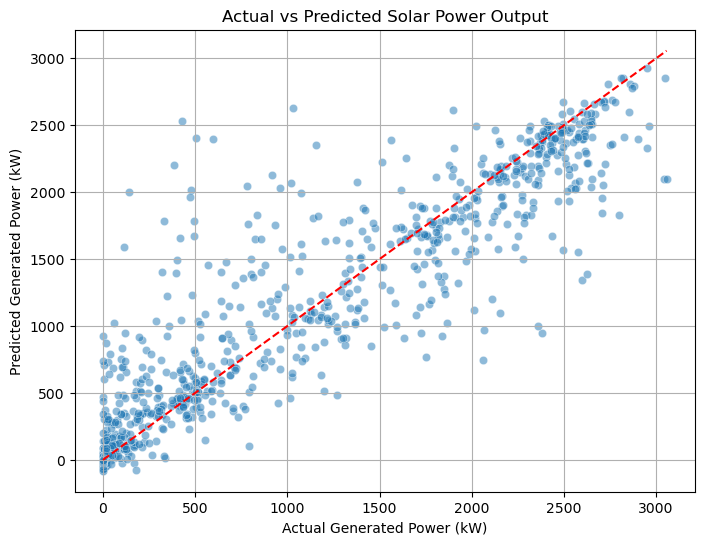

In [20]:
scaler = StandardScaler()
# Step 1: Define features and target while scaling it 
X = scaler.fit_transform(df.drop('generated_power_kw', axis=1))
y = df['generated_power_kw']

# Step 2: Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Step 3: Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.3f}")
print(f"XGBoost R² Score: {r2:.3f}")




plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Generated Power (kW)")
plt.ylabel("Predicted Generated Power (kW)")
plt.title("Actual vs Predicted Solar Power Output")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line
plt.grid(True)
plt.show()


#### To Check how good our model is to the mean 

In [21]:
print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())

relative_rmse = rmse / y.mean()
print(f"Relative RMSE: {relative_rmse:.2%}")


Min: 0.000595238
Max: 3056.7941
Mean: 1134.3473126838471
Relative RMSE: 35.04%


#### XGBOST WITH RANDOMIZEDSEARCHCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Create model
xgb = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all cores
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best params
print("Best parameters:", random_search.best_params_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.3f}")
print(f"XGBoost R² Score: {r2:.3f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
XGBoost RMSE: 391.171
XGBoost R² Score: 0.832


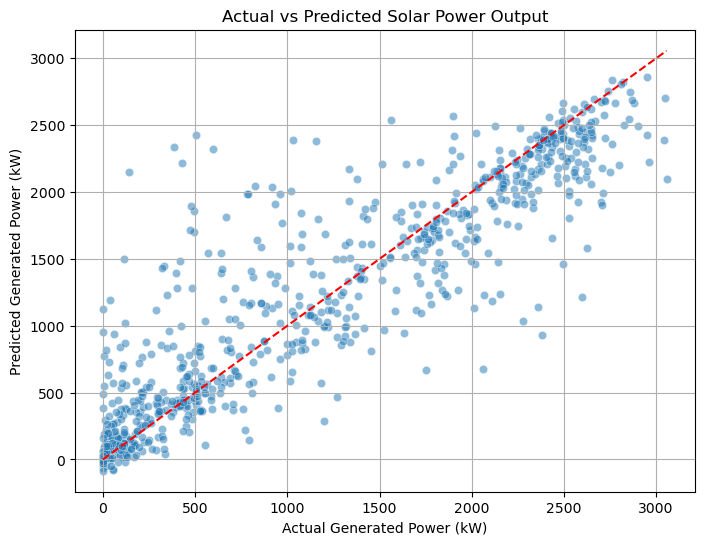

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Generated Power (kW)")
plt.ylabel("Predicted Generated Power (kW)")
plt.title("Actual vs Predicted Solar Power Output")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line
plt.grid(True)
plt.show()

In [24]:
print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())

relative_rmse = rmse / y.mean()
print(f"Relative RMSE: {relative_rmse:.2%}")

Min: 0.000595238
Max: 3056.7941
Mean: 1134.3473126838471
Relative RMSE: 34.48%


#### XGBOOST WITH GRIDSEARCHCV

In [27]:
# Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit
xgb_grid.fit(X_train, y_train)

# Best model
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost params:", xgb_grid.best_params_)

# Predict
y_xgb_pred = best_xgb.predict(X_test)

# Evaluate XGBoost
xgb_r2 = r2_score(y_test, y_xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_pred))
print(f"XGBoost → R²: {xgb_r2:.3f}, RMSE: {xgb_rmse:.3f}")

print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())

relative_rmse = xgb_rmse / y.mean()
print(f"Relative RMSE: {relative_rmse:.2%}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGBoost params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
XGBoost → R²: 0.828, RMSE: 396.009
Min: 0.000595238
Max: 3056.7941
Mean: 1134.3473126838471
Relative RMSE: 34.91%


#### RANDOM FOREST REGRESSOR 

In [72]:
# Step 1: Split the data
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,  
    random_state=42,
    n_jobs=-1  # Use all cores
)

# Step 3: Train the model
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
relative_rmse = rmse / y_test.mean()

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Relative RMSE: {relative_rmse:.2%}")


R² Score: 0.818
RMSE: 407.741
Relative RMSE: 36.25%


#### RANDOMFOREST WITH RANDOMIZEDSEARCHCV

In [73]:
# Step 1: Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Step 2: Create the base model
rf = RandomForestRegressor(random_state=42)

# Step 3: Randomized Search setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1  # use all CPU cores
)

# Step 4: Fit to training data
random_search.fit(X_train, y_train)

# Step 5: Evaluate the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
relative_rmse = rmse / y_test.mean()

print("Best parameters:", random_search.best_params_)
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Relative RMSE: {relative_rmse:.2%}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
R² Score: 0.824
RMSE: 401.135
Relative RMSE: 35.66%


#### RANDOMFOREST WITH GRIDSEARCHCV

In [32]:
# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
print("Best Random Forest params:", rf_grid.best_params_)


# Predict
y_rf_pred = best_rf.predict(X_test)

# Evaluate Random Forest
rf_r2 = r2_score(y_test, y_rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print(f"Random Forest → R²: {rf_r2:.3f}, RMSE: {rf_rmse:.3f}")

print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())

relative_rmse = rf_rmse / y.mean()
print(f"Relative RMSE: {relative_rmse:.2%}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils

Best Random Forest params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest → R²: 0.824, RMSE: 400.915
Min: 0.000595238
Max: 3056.7941
Mean: 1134.3473126838471
Relative RMSE: 35.34%


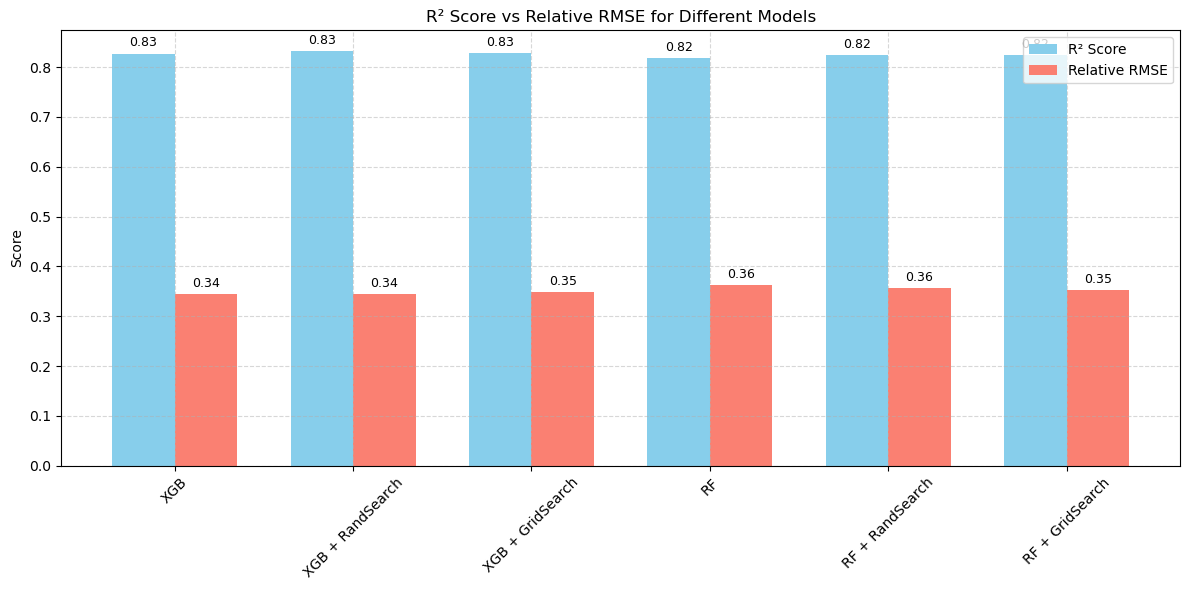

In [33]:
# Model labels
models = [
    "XGB", "XGB + RandSearch", "XGB + GridSearch",
    "RF", "RF + RandSearch", "RF + GridSearch"
]

# R² scores 
r2_scores = [0.827, 0.832, 0.828, 0.818, 0.824, 0.824]

# Relative RMSE scores (example values, lower is better)
# Let's say the RMSEs divided by mean(y_test)
rel_rmse = [0.345, 0.345, 0.349, 0.363, 0.357, 0.353]

x = np.arange(len(models))  # Label locations
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax1.bar(x + width/2, rel_rmse, width, label='Relative RMSE', color='salmon')

# Labels and styling
ax1.set_ylabel('Score')
ax1.set_title('R² Score vs Relative RMSE for Different Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()




## 🧾 Conclusion

In this project, we developed and evaluated multiple regression models to predict **solar power generation** using environmental and meteorological features. The goal was to enable accurate estimation of solar output based on real-world sensor data — a key capability for energy management and smart grid systems.

I treated this as a **regression problem**, with `generated_power_kw` as the continuous target variable.

After preprocessing and feature engineering (e.g., calculating relative RMSE, handling directional and cloud cover variables), we trained and compared two powerful ensemble models: **XGBoost Regressor** and **Random Forest Regressor**. Each model was tuned using both **RandomizedSearchCV** and **GridSearchCV** to optimize performance.

---

#### 📈 Model Evaluation Summary

| Model                         | R² Score | Relative RMSE |
| ----------------------------- | -------- | ------------- |
| **XGBoost (GridSearchCV)**    | **0.83** | **0.35**      |
| XGBoost (RandomSearchCV)      | 0.83     | 0.34          |
| XGBoost (Baseline)            | 0.83     | 0.34          |
| RandomForest (GridSearchCV)   | 0.82     | 0.35          |
| RandomForest (RandomSearchCV) | 0.82     | 0.36          |
| **RandomForest (Baseline)**   | **0.82** | **0.36**      |

**Best Model:** ✅ **XGBoost with GridSearchCV** — demonstrated the highest R² score (0.83) and the lowest relative RMSE (0.34), making it the most accurate and consistent predictor of solar power generation in this study.

---

## 📌 Next Steps / Recommendations

* **Feature Interpretation**: Use SHAP or permutation importance to analyze which environmental factors influence solar power most.
* **Temporal Modeling**: Incorporate timestamps (if available) to model seasonality or hourly patterns using time series or recurrent models.
* **Data Augmentation**: Combine with satellite or remote sensing data for better spatial generalization.
* **Model Deployment**: Deploy the model as an API using FastAPI, Azure ML, or AWS SageMaker for real-time solar power predictions.
* **Model Monitoring**: Set up retraining pipelines and drift detection to maintain model accuracy over time.

---

## 🔧 Final Note

This project demonstrates how **machine learning can effectively forecast solar power output** from atmospheric data — a critical step toward smarter, cleaner, and more efficient energy infrastructure.
